In [1]:
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
folderPath = "/Users/jwh/Desktop/0912/Test1/result/"

fileList = [file for file in sorted(glob.glob(folderPath + "*.csv")) if os.path.isfile(file)]

In [6]:
sensor1List = []
sensor2List = []
sensor3List = []
sensor4List = []
sensor5List = []
sensor6List = []
for file in fileList:
    if file[-15:-8] == "sensor1":
        sensor1List.append(file)
    elif file[-15:-8] == "sensor2":
        sensor2List.append(file)
    elif file[-15:-8] == "sensor3":
        sensor3List.append(file)
    elif file[-15:-8] == "sensor4":
        sensor4List.append(file)
    elif file[-15:-8] == "sensor5":
        sensor5List.append(file)
    elif file[-15:-8] == "sensor6":
        sensor6List.append(file)

In [9]:
sensor1List

['/Users/jwh/Desktop/0912/Test1/result/sensor1_D10.csv',
 '/Users/jwh/Desktop/0912/Test1/result/sensor1_D20.csv',
 '/Users/jwh/Desktop/0912/Test1/result/sensor1_D30.csv',
 '/Users/jwh/Desktop/0912/Test1/result/sensor1_D40.csv',
 '/Users/jwh/Desktop/0912/Test1/result/sensor1_U10.csv',
 '/Users/jwh/Desktop/0912/Test1/result/sensor1_U20.csv',
 '/Users/jwh/Desktop/0912/Test1/result/sensor1_U30.csv',
 '/Users/jwh/Desktop/0912/Test1/result/sensor1_U40.csv']

In [26]:
def makeDistanceData(sensorList, colNumber, sensorData):
    for f in sensorList:
        distance = f[-7:-4]
        sensor = pd.read_csv(f, sep= ",", usecols= [colNumber], names= [f"{distance}"], skiprows= 200, nrows= 1000)
        sensorData = pd.concat((sensorData, sensor), axis= 1)

    return sensorData

In [27]:
sensor1Data = pd.DataFrame()
sensor1 = makeDistanceData(sensor1List, colNumber= 0, sensorData= sensor1Data)

sensor2Data = pd.DataFrame()
sensor2 = makeDistanceData(sensor2List, colNumber= 1, sensorData= sensor2Data)

sensor3Data = pd.DataFrame()
sensor3 = makeDistanceData(sensor3List, colNumber= 2, sensorData= sensor3Data)

sensor4Data = pd.DataFrame()
sensor4 = makeDistanceData(sensor4List, colNumber= 3, sensorData= sensor4Data)

sensor5Data = pd.DataFrame()
sensor5 = makeDistanceData(sensor5List, colNumber= 4, sensorData= sensor5Data)

sensor6Data = pd.DataFrame()
sensor6 = makeDistanceData(sensor6List, colNumber= 5, sensorData= sensor6Data)

In [28]:
base123 = pd.read_csv(fileList[0], sep= ",", usecols= [0, 1, 2])
base456 = pd.read_csv(fileList[1], sep= ",", usecols= [3, 4, 5])

meanBase123 = base123.mean(axis= 0)
meanBase456 = base456.mean(axis= 0)

meanBase123

s1    697.045252
s2    679.516007
s3    758.246116
dtype: float64

In [33]:
def calibration(sensor, meanBase, sensorNumber):
    calibratedSensor = sensor - meanBase.iloc[sensorNumber]
    return calibratedSensor

In [34]:
calibratedSensor1 = calibration(sensor1, meanBase123, 0)
calibratedSensor2 = calibration(sensor2, meanBase123, 1)
calibratedSensor3 = calibration(sensor3, meanBase123, 2)
calibratedSensor4 = calibration(sensor4, meanBase456, 0)
calibratedSensor5 = calibration(sensor5, meanBase456, 1)
calibratedSensor6 = calibration(sensor6, meanBase456, 2)

In [56]:
def plotUpDownSensor(calibratedSensor, title):
    fig, axs = plt.subplots(1, 2)
    calibratedSensor.iloc[:, 0:4].plot(kind= "line", ax= axs[0])
    calibratedSensor.iloc[:, 4:8].plot(kind= "line", ax= axs[1])
    fig.suptitle(title)
    plt.show()

In [57]:
calibratedSensorList = [calibratedSensor1, calibratedSensor2, calibratedSensor3, calibratedSensor4, calibratedSensor5, calibratedSensor6]

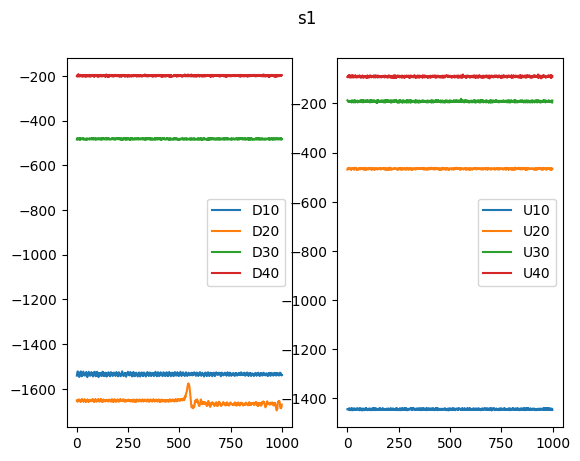

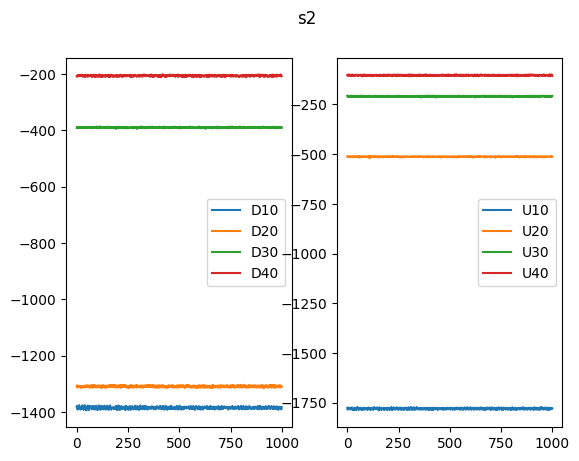

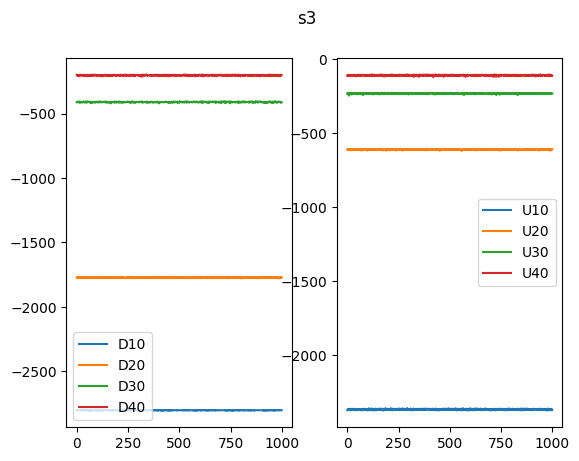

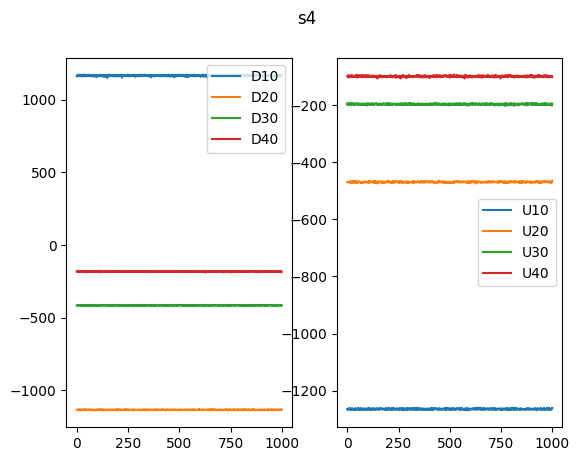

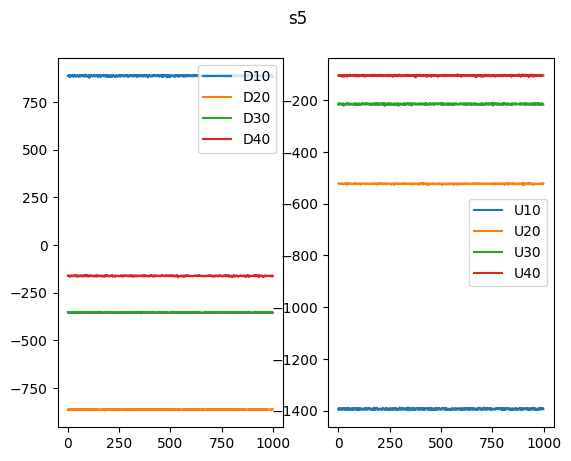

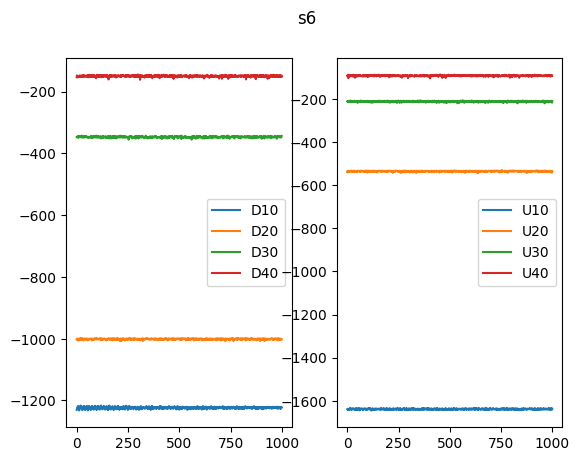

In [58]:
sensorName = [f"s{i}" for i in np.arange(1, 7, 1)]

for i in range(len(calibratedSensorList)):
    plotUpDownSensor(calibratedSensorList[i], title= sensorName[i])